In [131]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [132]:

df = pd.read_csv(r'C:\\Users\\LENOVO\\python\\datasets\\marketing\Marketing_data.csv')

In [133]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [135]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [136]:
#Visualizamos a aquel cliente que tiene compras de 40,761.25, el cual tiene suficiente dinero en su cuenta, casi no pide adelanteos de efectivo, con buen limite de tarjeta de credito
df[df['ONEOFF_PURCHASES']==40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [137]:
#Visualizamos a aquel cliente que tiene adelantos de 47,137, el cual tiene suficiente dinero en su cuenta, casi no compra, con buen limite de tarjeta de credito

df[df['CASH_ADVANCE']==47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

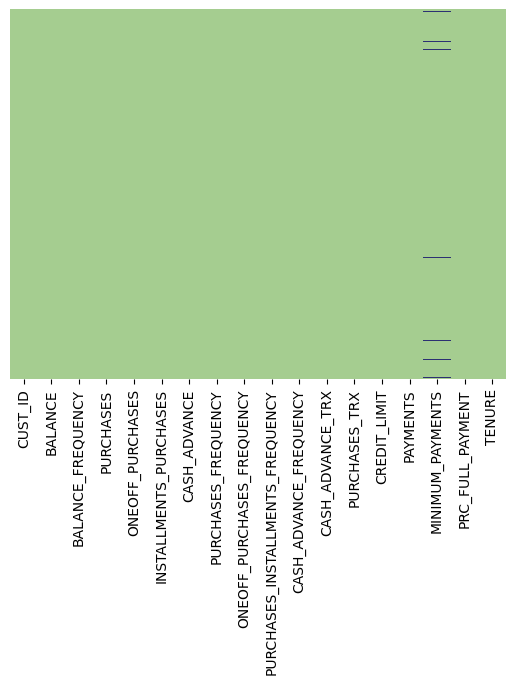

In [138]:
#veamos si hay valores nulos con un heatmap
import seaborn as sns
sns.heatmap(df.isna(),cbar=False,cmap="crest",yticklabels=False)

In [139]:
#valores nulos
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [140]:
#rellenamos con la media
df.loc[(df['MINIMUM_PAYMENTS']).isnull(),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [141]:
df.loc[(df['CREDIT_LIMIT']).isnull(),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [142]:
#volvemos a validar nulos
df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [143]:
#Validamos duplicados
df[df.duplicated()].sum()

CUST_ID                               0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                                0
dtype: object

In [144]:
#Eliminamos columna "CUST_ID"
df.drop('CUST_ID',axis=1,inplace=True)

In [145]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [146]:
len(df.columns)

17

In [147]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

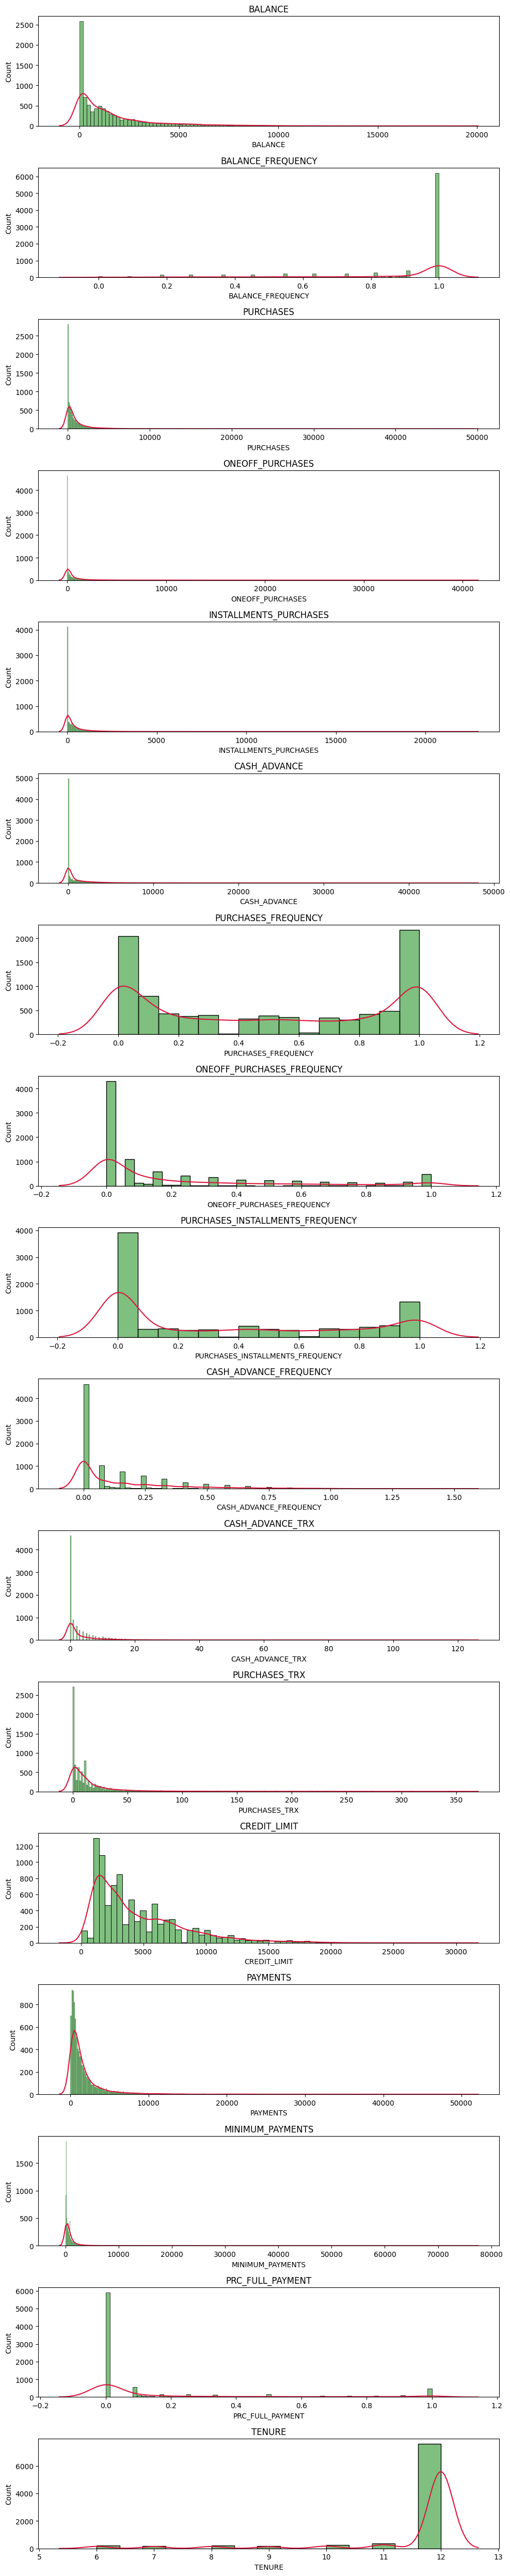

In [148]:
#Creamos un ciclo for para graficar las distribuciones junto a su KDE
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns),1,i+1)
    ax=sns.histplot(df[df.columns[i]],color='g',kde=True, kde_kws=dict(cut=3))#combina grafico hist y kde
    ax.lines[0].set_color('crimson')
    plt.title(df.columns[i])
plt.tight_layout() #imprime en espacio disponible

In [149]:
correlations=df.corr()

<Axes: >

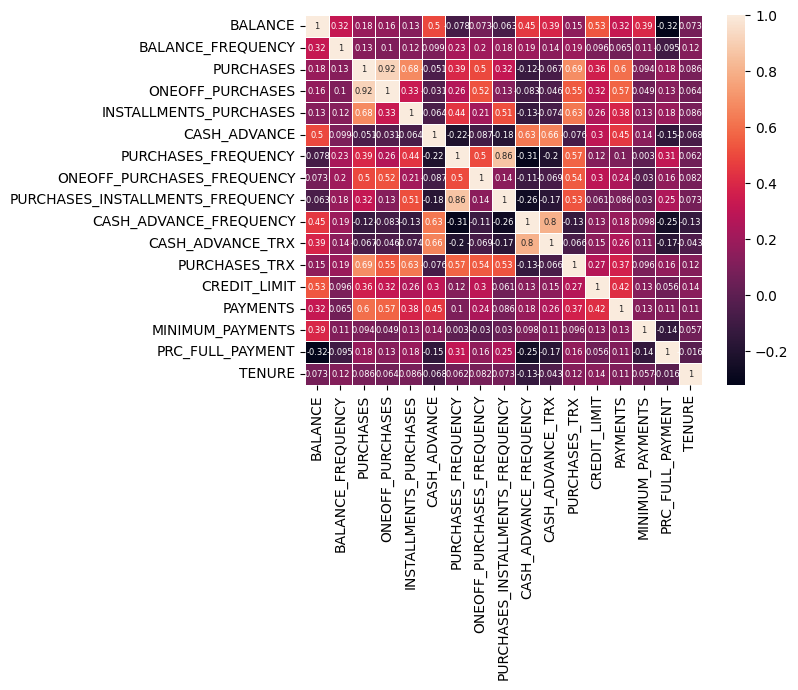

In [150]:
#Visualizamos la matriz de correlaciones con heatmap
f,ax=plt.subplots=(20,20)
sns.heatmap(correlations,annot=True,linewidth=.5,annot_kws={'size': 6})

### Usaremos metodo del codo para determinar el número óptimo de clusters


In [151]:
#Estandarizamos los datos
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [152]:
df_scaled.shape

(8950, 17)

In [153]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

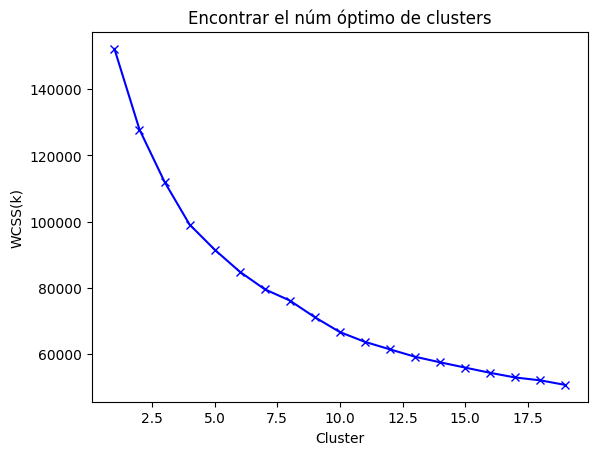

In [155]:

scores_1=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(df_scaled)#se aplica a los datos
    scores_1.append(kmeans.inertia_)# inertia es la suma de los cuadrados intraclusters

plt.plot(range_values,scores_1,'bx-')
plt.title("Encontrar el núm óptimo de clusters")
plt.xlabel('Cluster')
plt.ylabel('WCSS(k)')
plt.show()
    

### Aplicando Kmeans

In [156]:
kmeans=KMeans(8)
kmeans.fit(df_scaled)
labels=kmeans.labels_

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [157]:
kmeans.cluster_centers_.shape

#8 baricentros de 17 dim

(8, 17)

In [158]:
clusters_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[df.columns])
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.008793,0.402775,-0.346571,-0.226676,-0.402900,-0.107338,-0.833674,-0.362573,-0.761795,0.083258,-0.043749,-0.472256,-0.304604,-0.248944,-0.043992,-0.455224,0.271987
1,1.620841,0.397538,-0.222449,-0.155871,-0.239680,1.968457,-0.470517,-0.185319,-0.423525,1.916865,1.902794,-0.263995,0.993003,0.777340,0.364236,-0.395196,0.068711
2,-0.701201,-2.137284,-0.304389,-0.228366,-0.300063,-0.321549,-0.538819,-0.436742,-0.428630,-0.522531,-0.377317,-0.414724,-0.172737,-0.188409,-0.257374,0.294989,0.201360
3,0.485465,0.455140,1.764413,1.528394,1.363944,-0.245030,1.153426,1.812177,0.947376,-0.356978,-0.267538,2.061923,1.107835,0.960137,0.088881,0.493209,0.310384
4,-0.340720,0.353530,0.026973,-0.094708,0.237600,-0.368649,0.978306,0.188689,0.901251,-0.470687,-0.359789,0.226675,-0.149914,-0.185314,-0.117577,0.328416,0.271314
5,1.541596,0.460520,0.153667,-0.209281,0.746860,0.241482,0.058963,-0.438680,0.259612,-0.128302,0.095420,0.313409,0.150286,0.146552,11.148839,-0.525551,0.304636
6,-0.347278,-0.335777,-0.280396,-0.206989,-0.282366,0.052265,-0.168696,-0.270088,-0.205723,0.288094,-0.009966,-0.378874,-0.564624,-0.390175,-0.208510,0.023253,-3.178142
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


### transformacion inversa sobre los centros

In [159]:
clusters_centers=scaler.inverse_transform(clusters_centers)
clusters_centers

array([[1.58277601e+03, 9.72684400e-01, 2.62751365e+02, 2.16200820e+02,
        4.67301742e+01, 7.53777483e+02, 1.55756995e-01, 9.42951800e-02,
        6.16806886e-02, 1.51804945e-01, 2.95027223e+00, 2.97132486e+00,
        3.38617665e+03, 1.01247435e+03, 7.61685001e+02, 2.05693103e-02,
        1.18813067e+01],
       [4.93811828e+03, 9.71443798e-01, 5.27939625e+02, 3.33723543e+02,
        1.94328300e+02, 5.10681647e+03, 3.01509477e-01, 1.47173458e-01,
        1.96117684e-01, 5.18728530e-01, 1.62339956e+01, 8.14790287e+00,
        8.10740016e+03, 3.98346801e+03, 1.71304240e+03, 3.81264746e-02,
        1.16092715e+01],
       [1.04984595e+02, 3.70967990e-01, 3.52873528e+02, 2.13397232e+02,
        1.39724457e+02, 3.04568780e+02, 2.74096469e-01, 7.21689607e-02,
        1.94088669e-01, 3.05804406e-02, 6.73913043e-01, 4.40133779e+00,
        3.86596107e+03, 1.18771756e+03, 2.64408454e+02, 2.39993747e-01,
        1.17867893e+01],
       [2.57492979e+03, 9.85089227e-01, 4.77289992e+03, 3.129

In [160]:
clusters_centers=pd.DataFrame(data=clusters_centers,columns=[df.columns])


In [161]:
clusters_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1582.776010,0.972684,262.751365,216.200820,46.730174,753.777483,0.155757,0.094295,0.061681,0.151805,2.950272,2.971325,3386.176649,1012.474349,761.685001,0.020569,11.881307
1,4938.118283,0.971444,527.939625,333.723543,194.328300,5106.816474,0.301509,0.147173,0.196118,0.518729,16.233996,8.147903,8107.400161,3983.468011,1713.042402,0.038126,11.609272
2,104.984595,0.370968,352.873528,213.397232,139.724457,304.568780,0.274096,0.072169,0.194089,0.030580,0.673913,4.401338,3865.961074,1187.717557,264.408454,0.239994,11.786789
3,2574.929788,0.985089,4772.899918,3129.258626,1644.465467,465.030965,0.953276,0.743065,0.740949,0.063709,1.423077,65.961538,8525.206044,4512.645256,1071.338936,0.297970,11.932692
4,855.294804,0.961019,1060.832775,435.241899,625.926822,205.795982,0.882992,0.258747,0.722617,0.040955,0.793531,20.344114,3949.002435,1196.677217,590.198697,0.249771,11.880406
5,4773.176698,0.986364,1331.517000,245.073000,1086.444000,1485.270586,0.514015,0.071591,0.467614,0.109470,3.900000,22.500000,5041.250000,2157.398392,26846.106549,0.000000,11.925000
6,841.644589,0.797728,404.135047,248.878789,155.727956,1088.473717,0.422645,0.121885,0.282678,0.192795,3.180818,5.292453,2440.117059,603.625073,378.283522,0.160516,7.264151
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


In [162]:
labels.shape

(8950,)

In [63]:
labels.min()

0

In [64]:
labels.max()

7

In [163]:
y_kmeans=kmeans.fit_predict(df_scaled)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [164]:
y_kmeans

array([1, 6, 7, ..., 3, 3, 3])

### Concatenar info original con las etiquetas

In [165]:
df_cluster=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


### hist respecto a los clusters

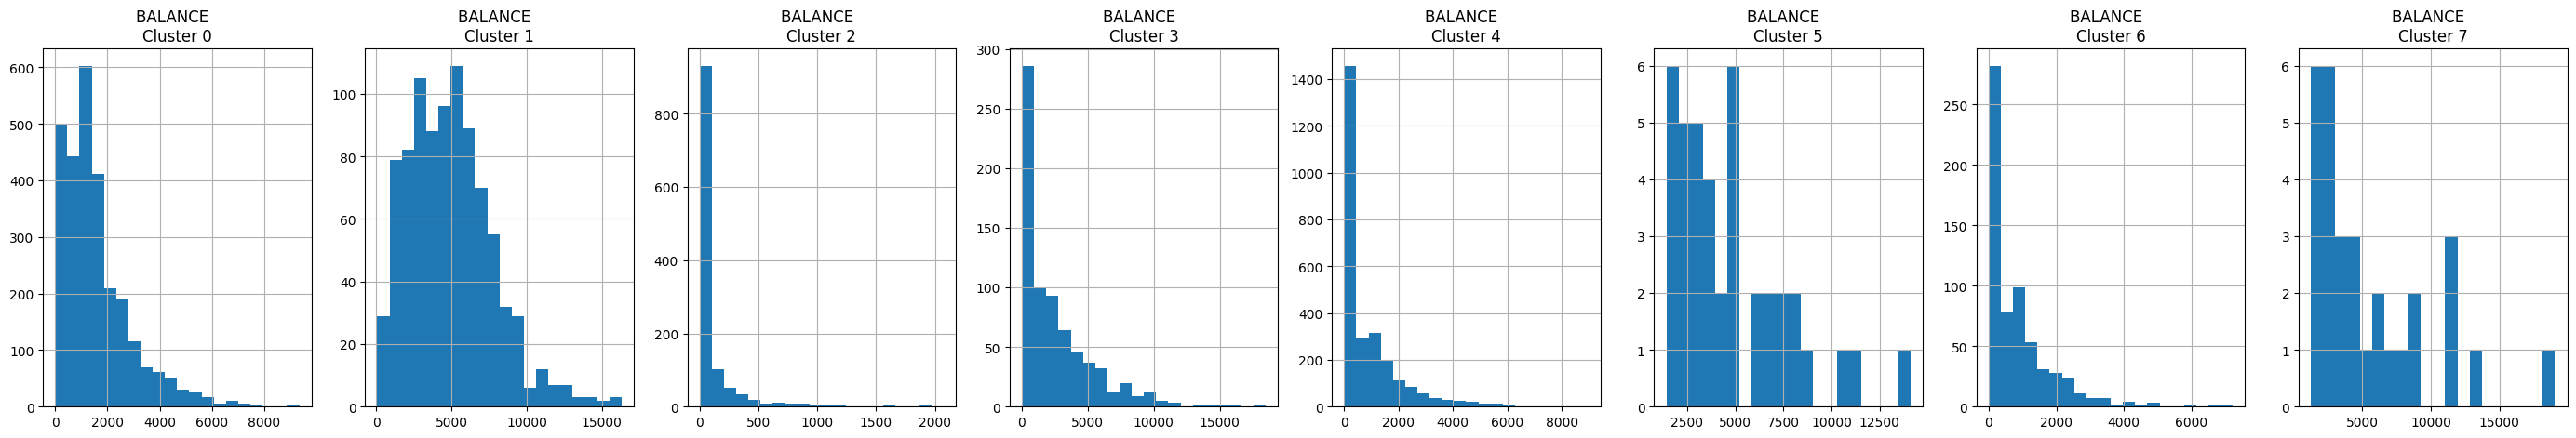

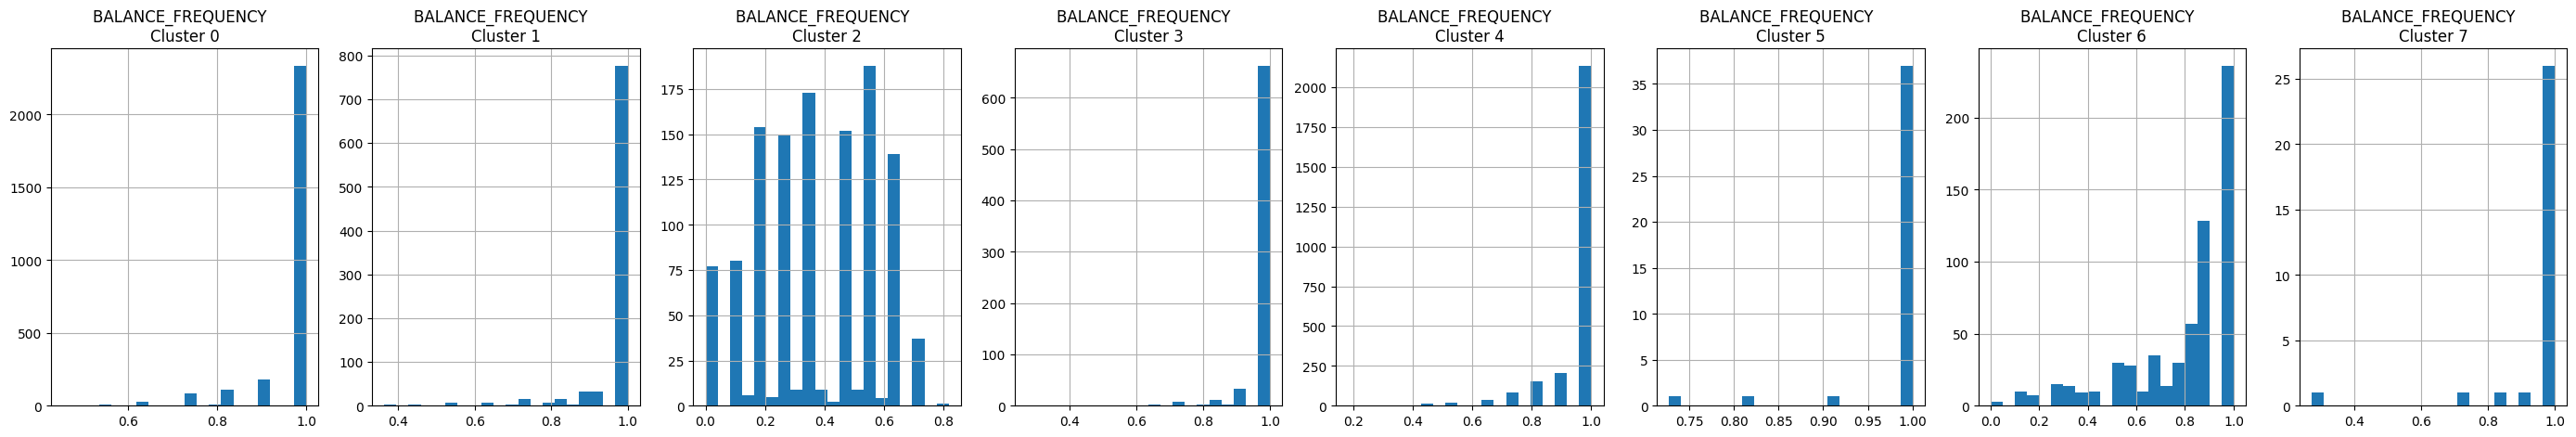

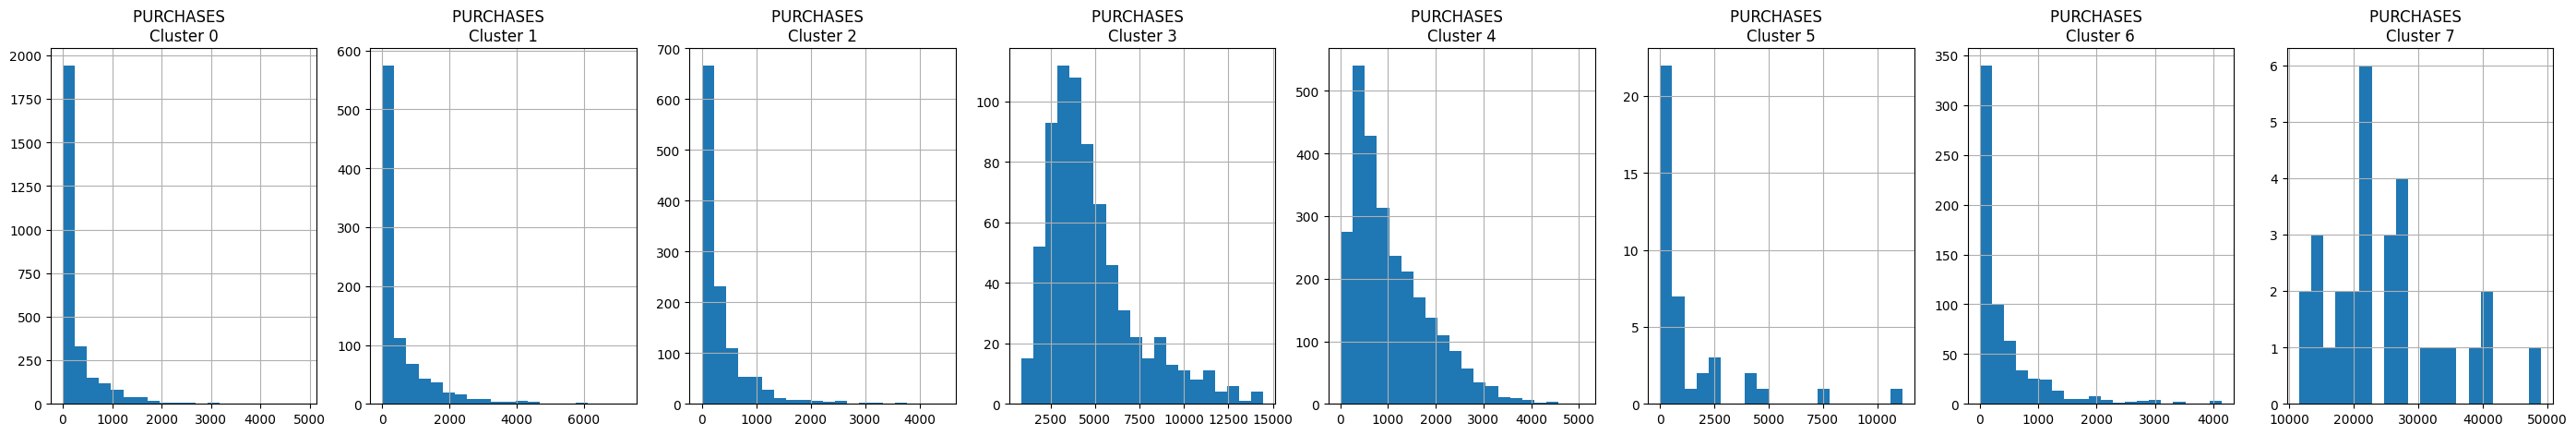

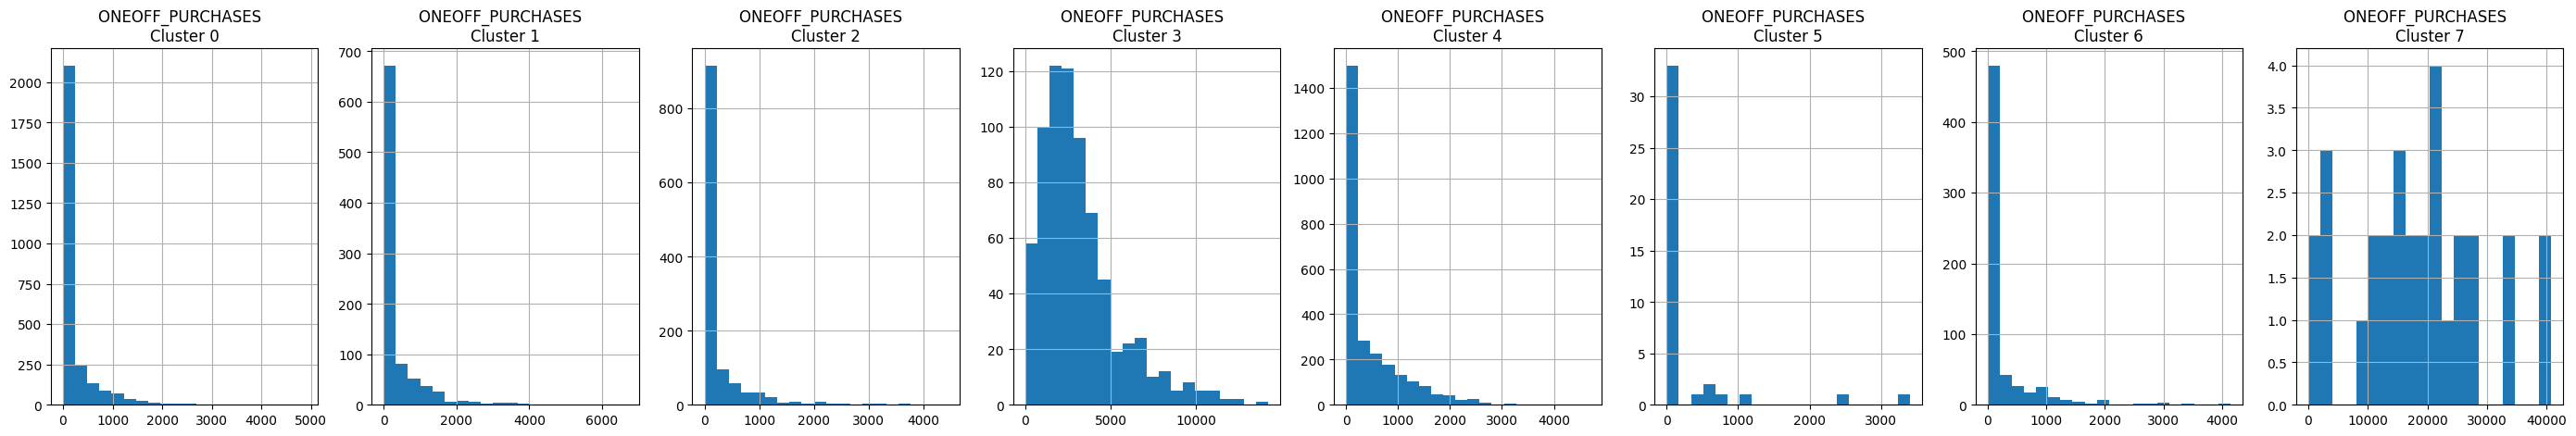

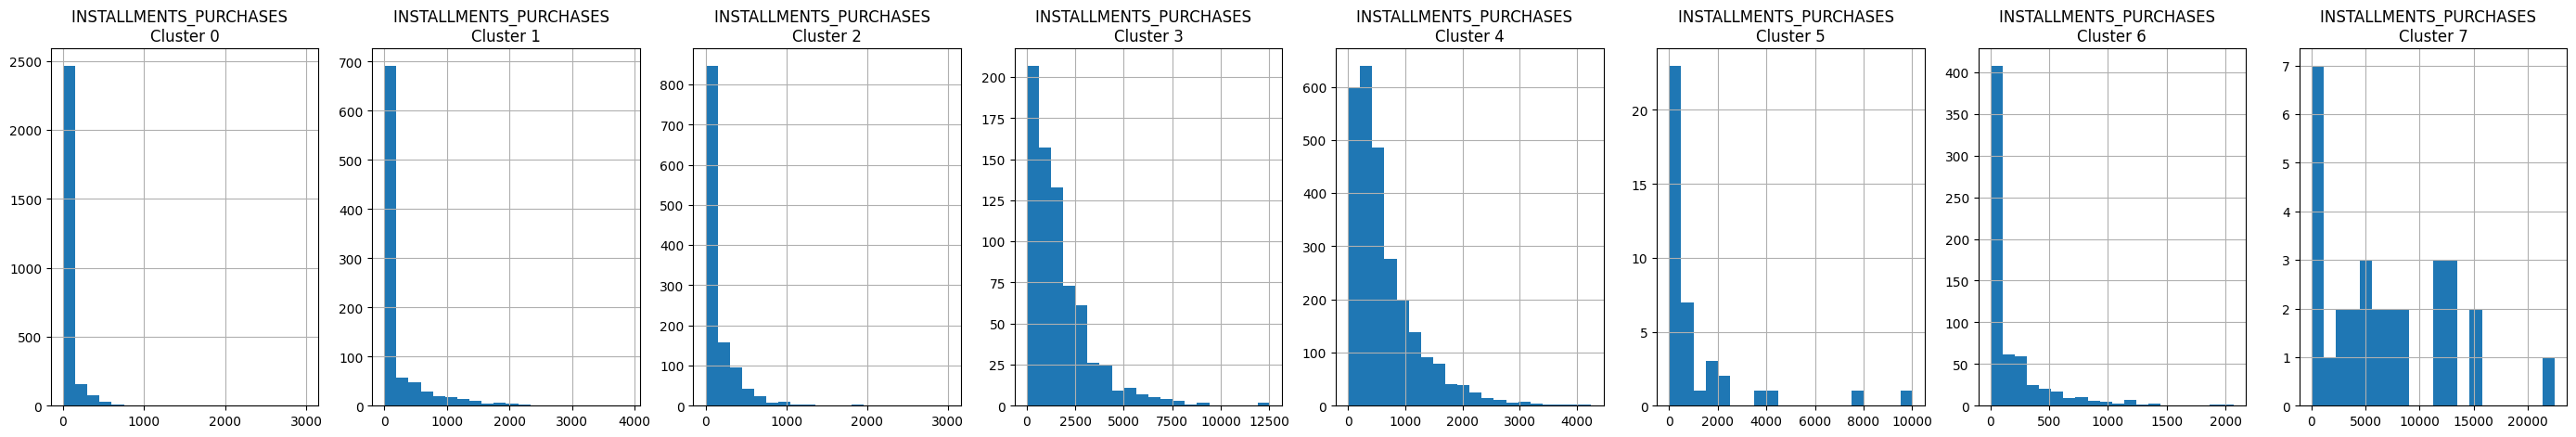

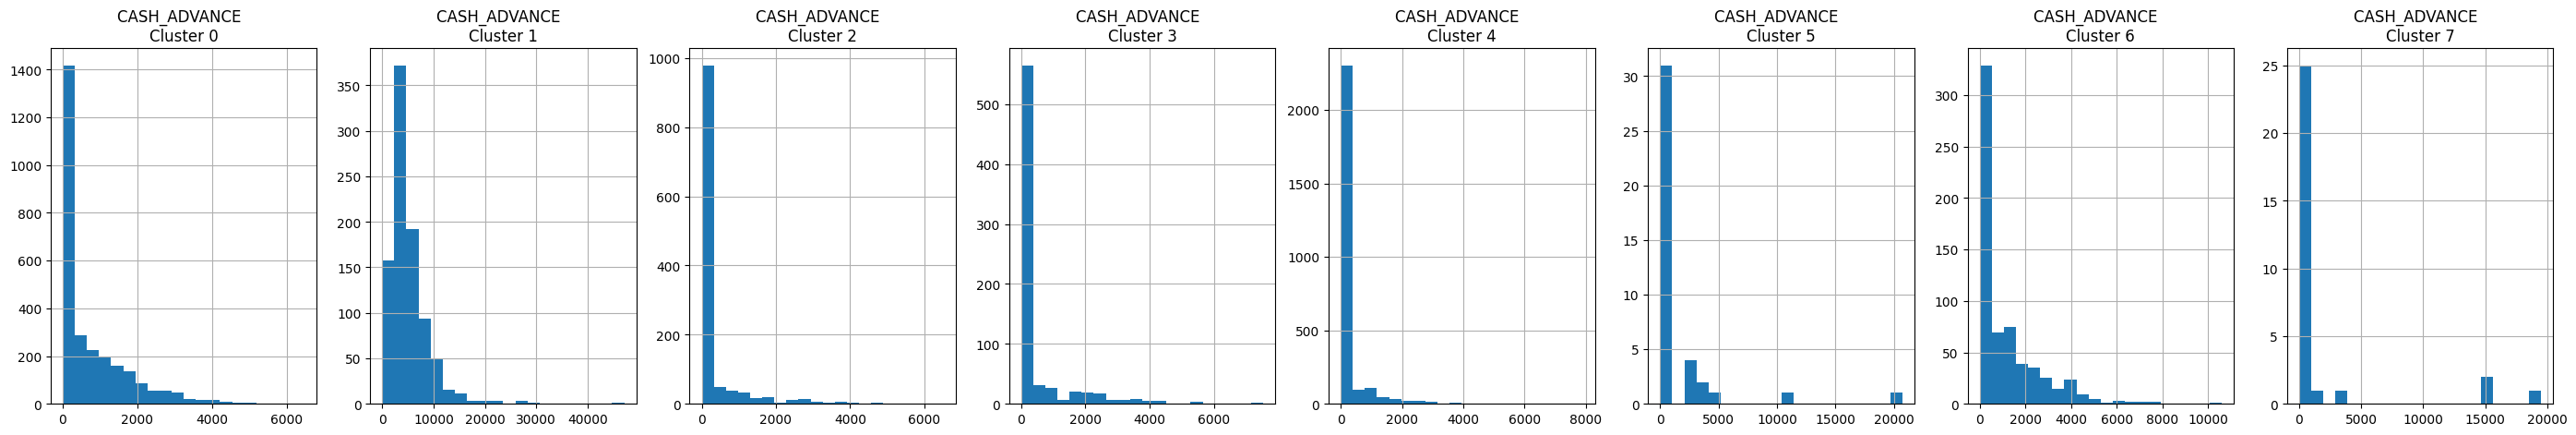

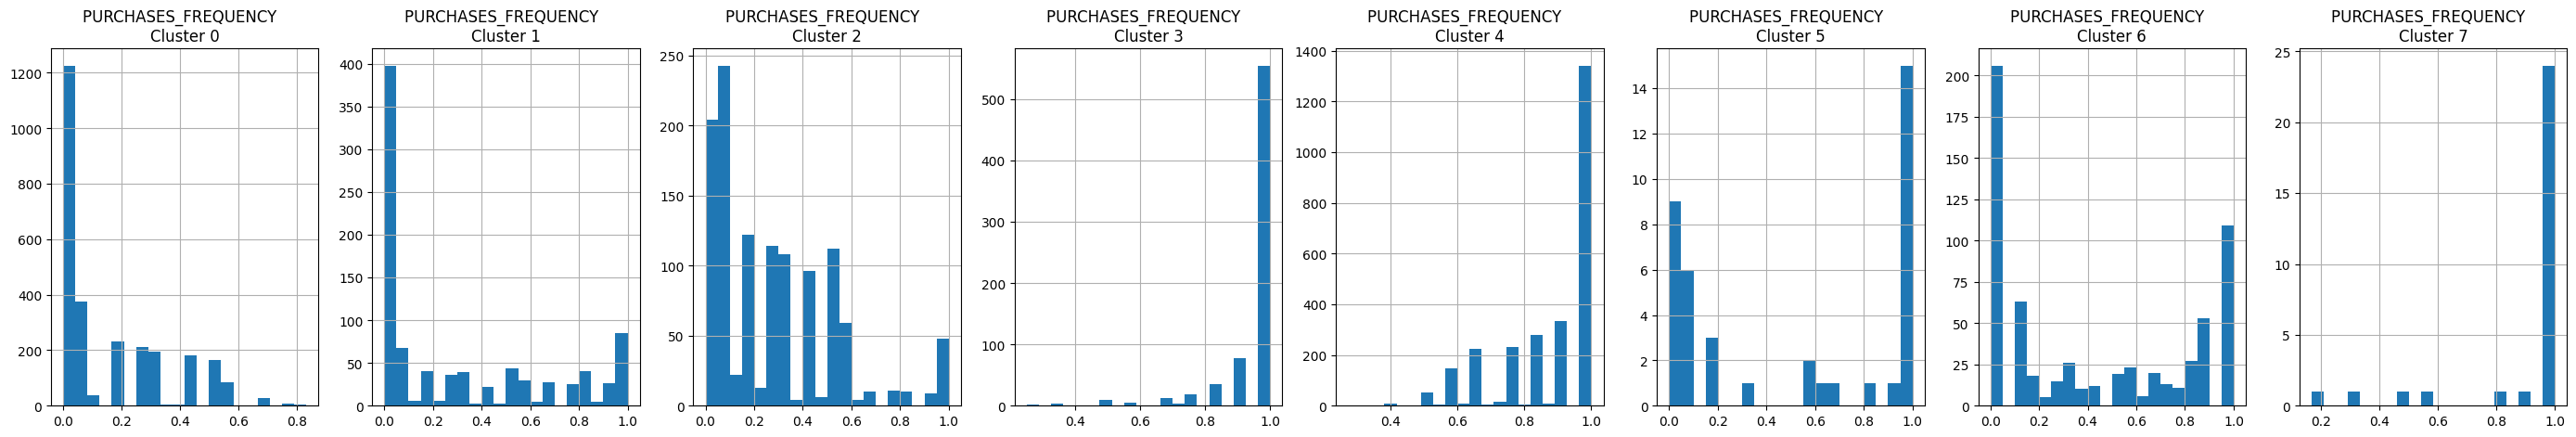

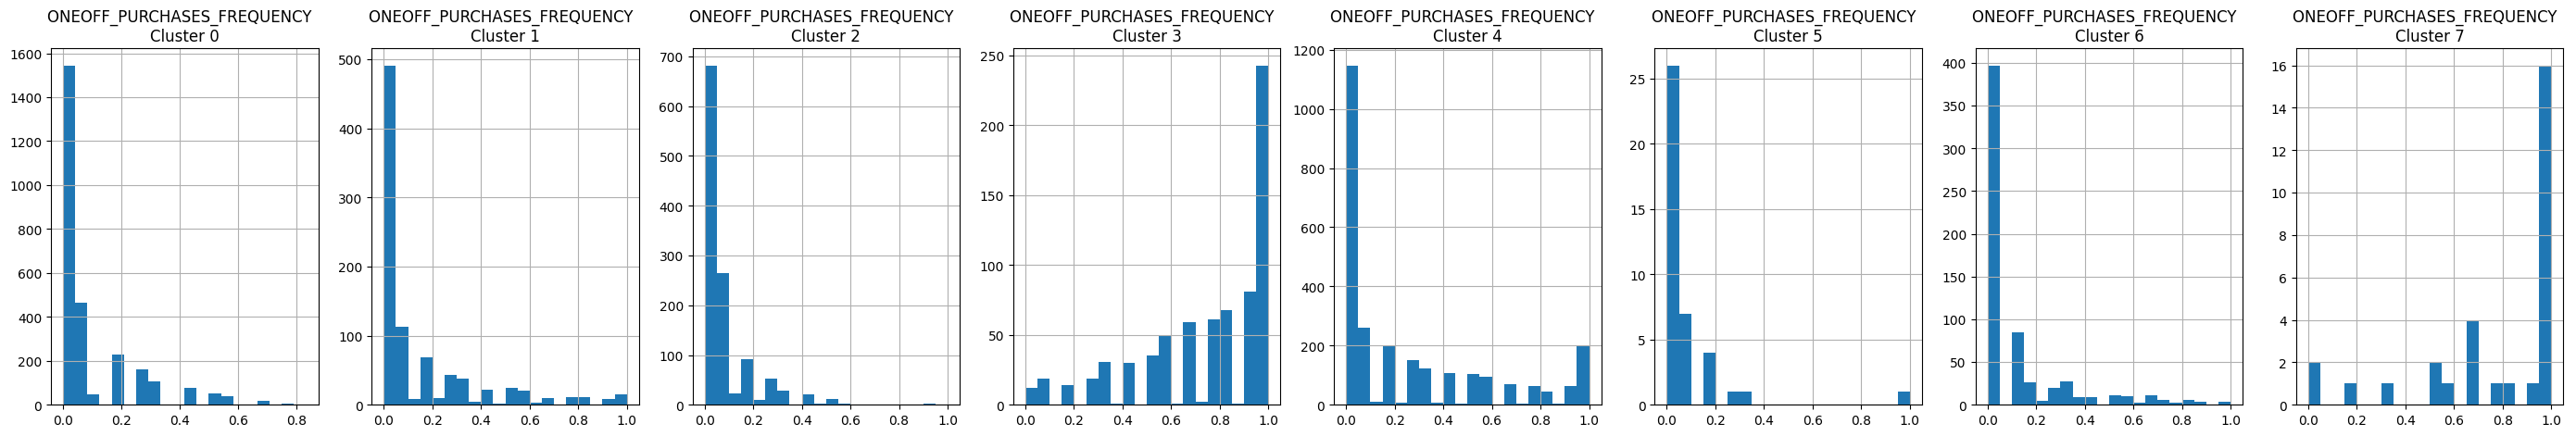

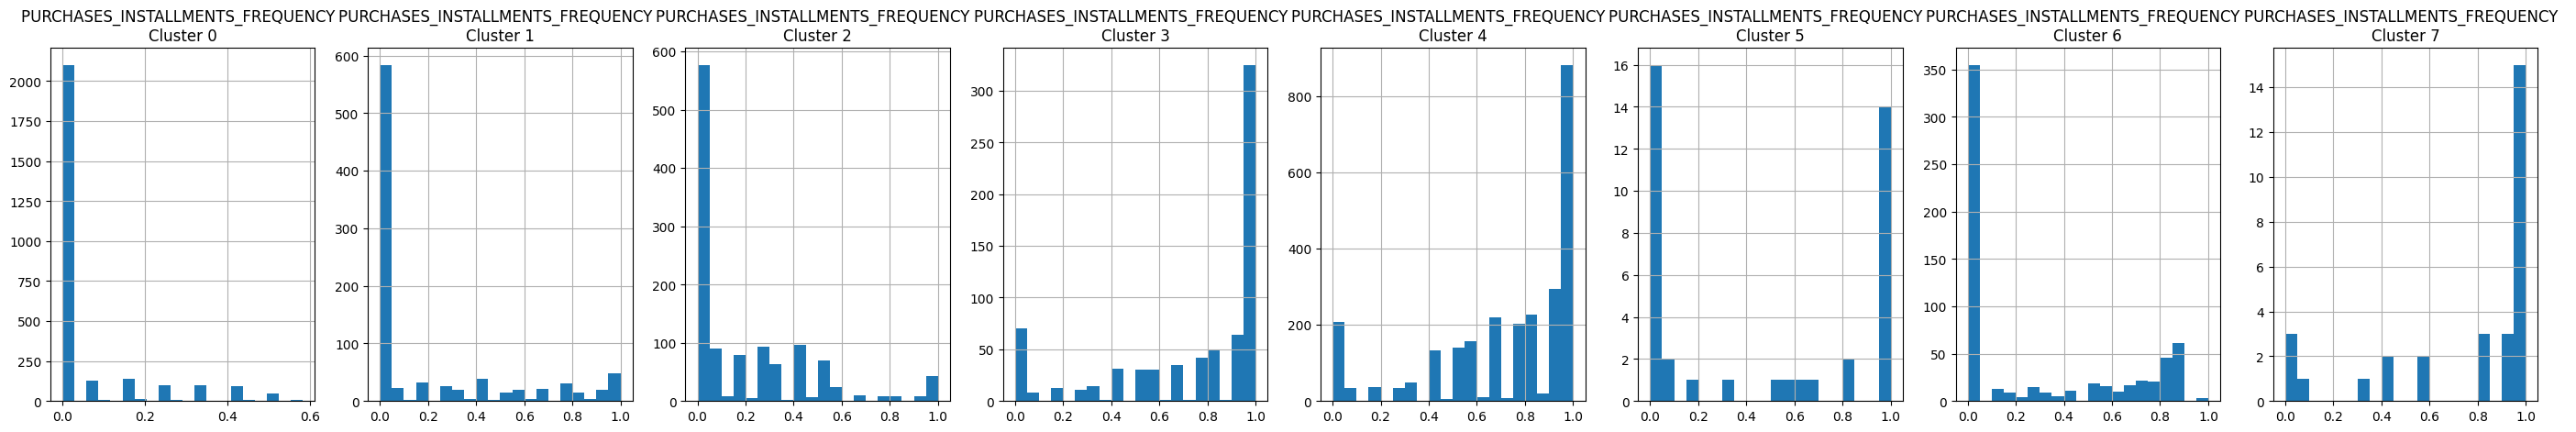

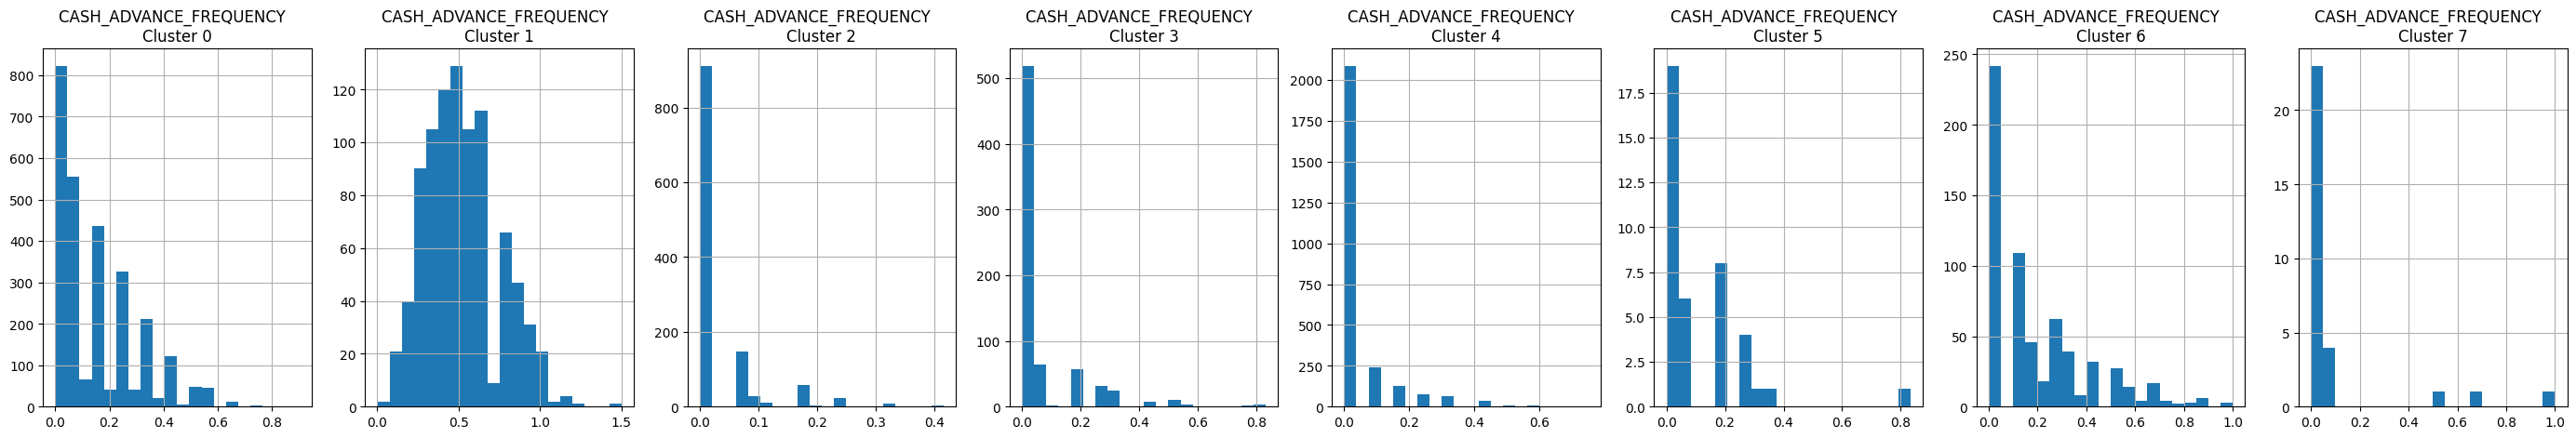

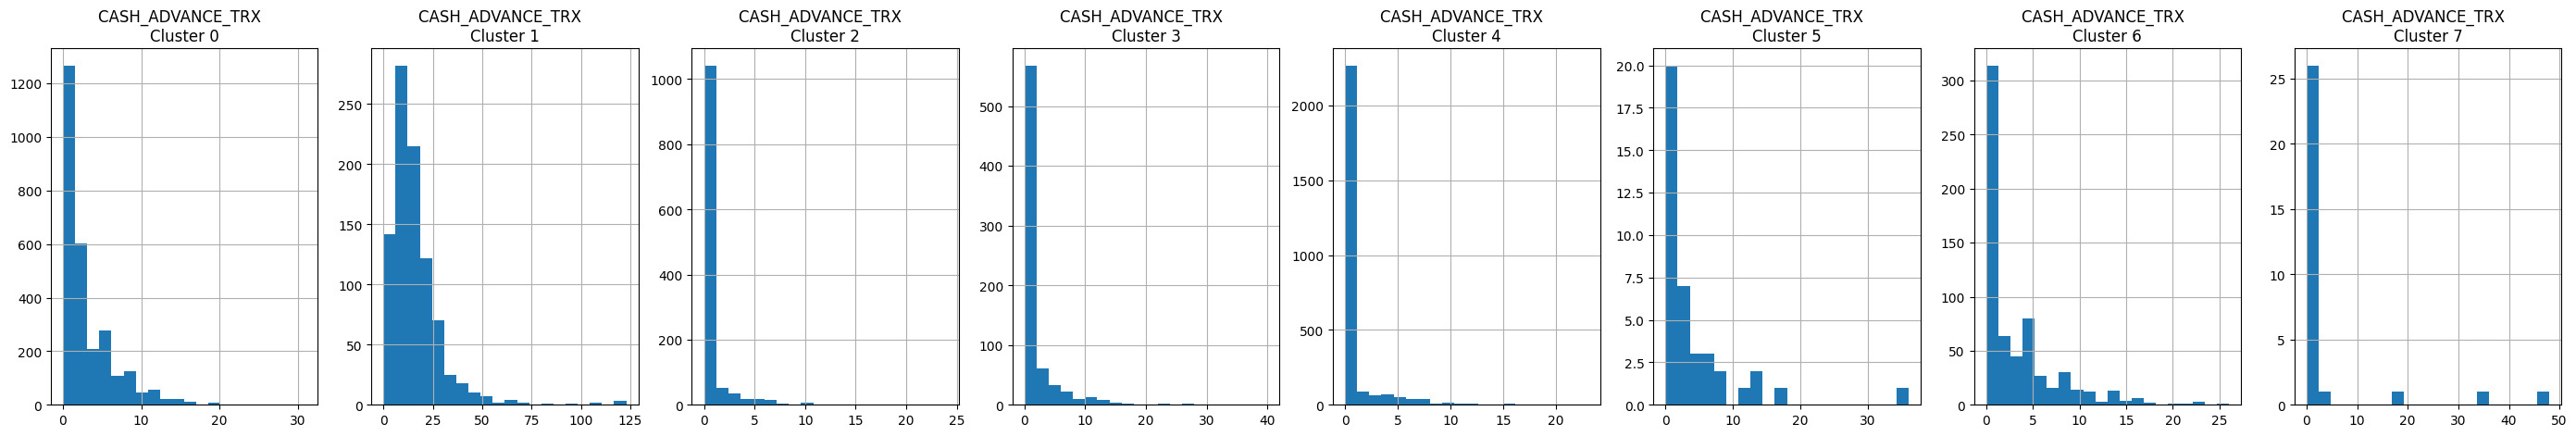

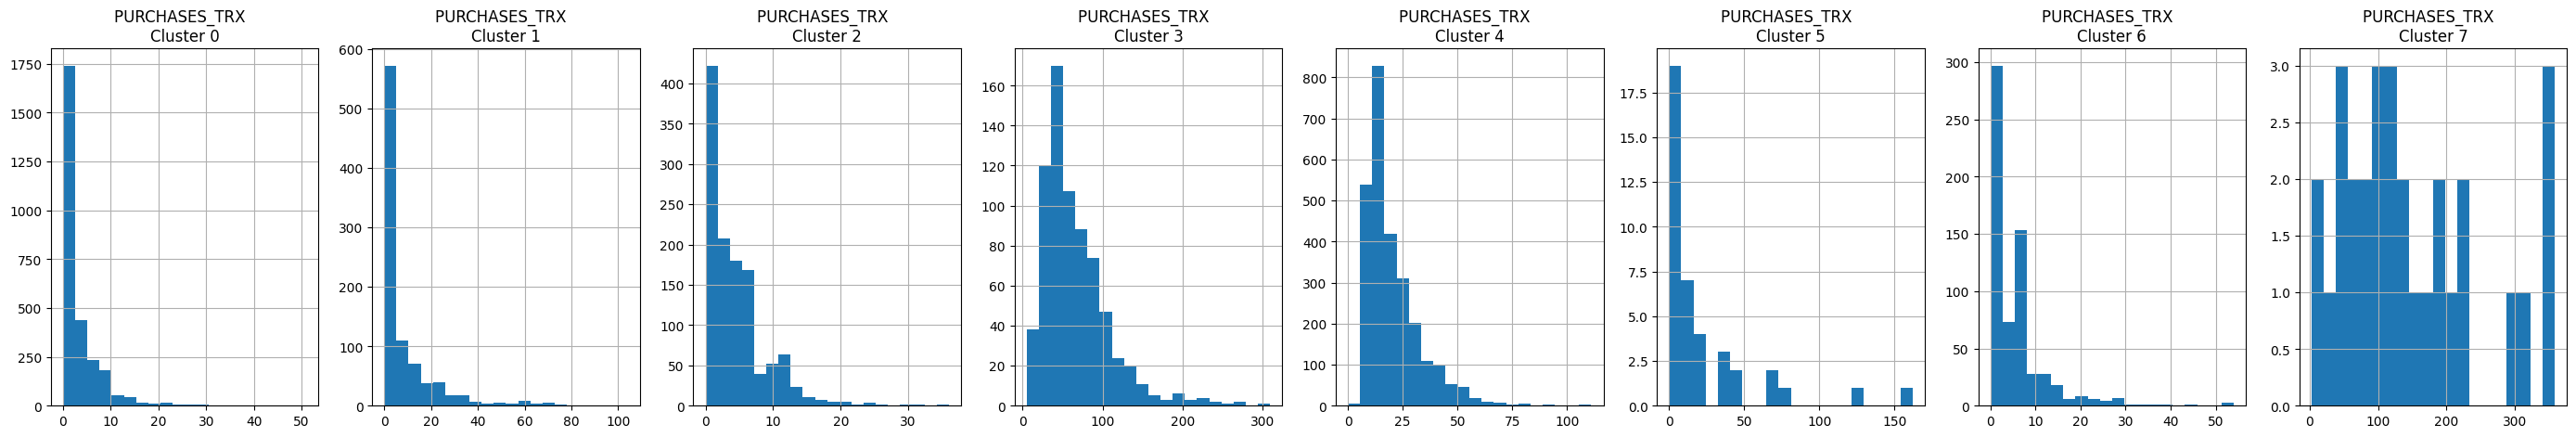

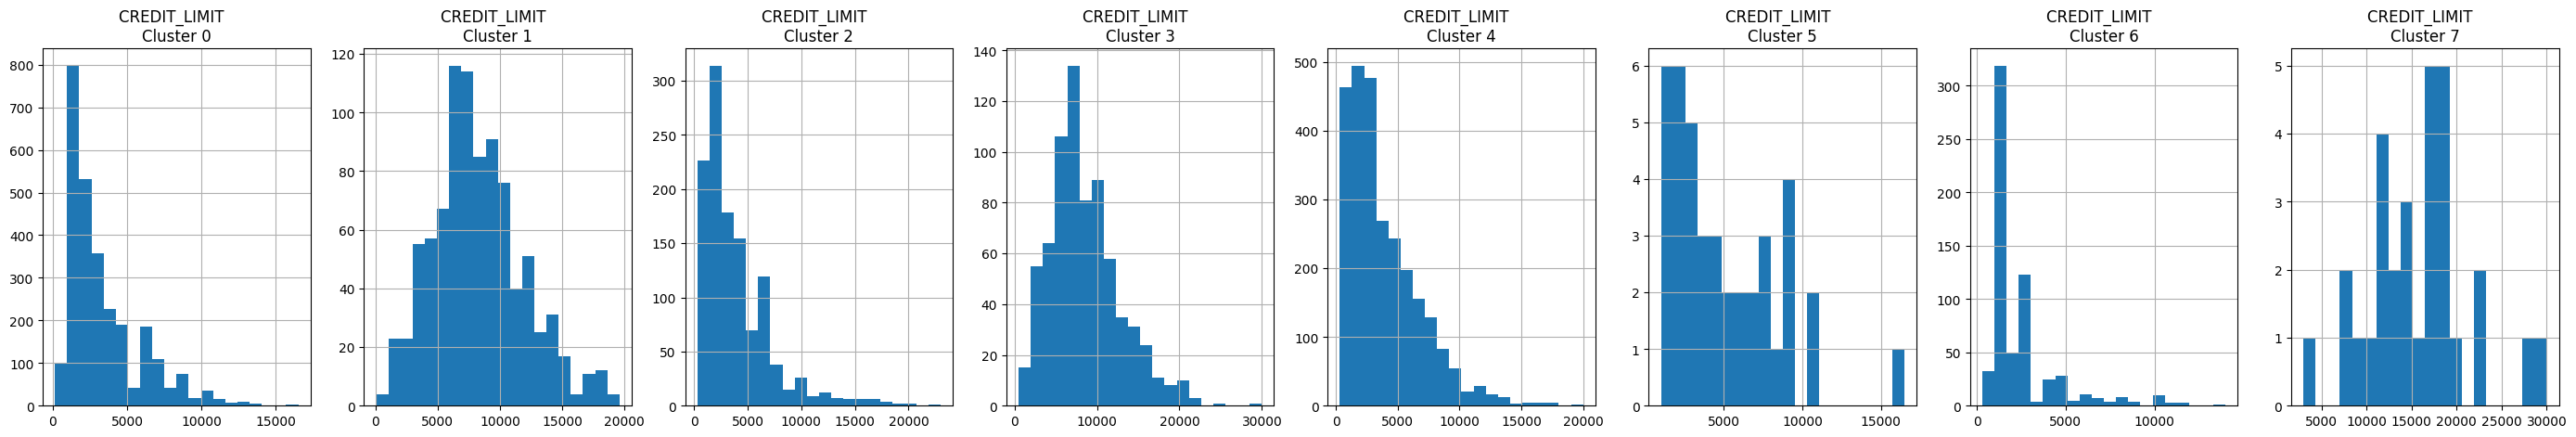

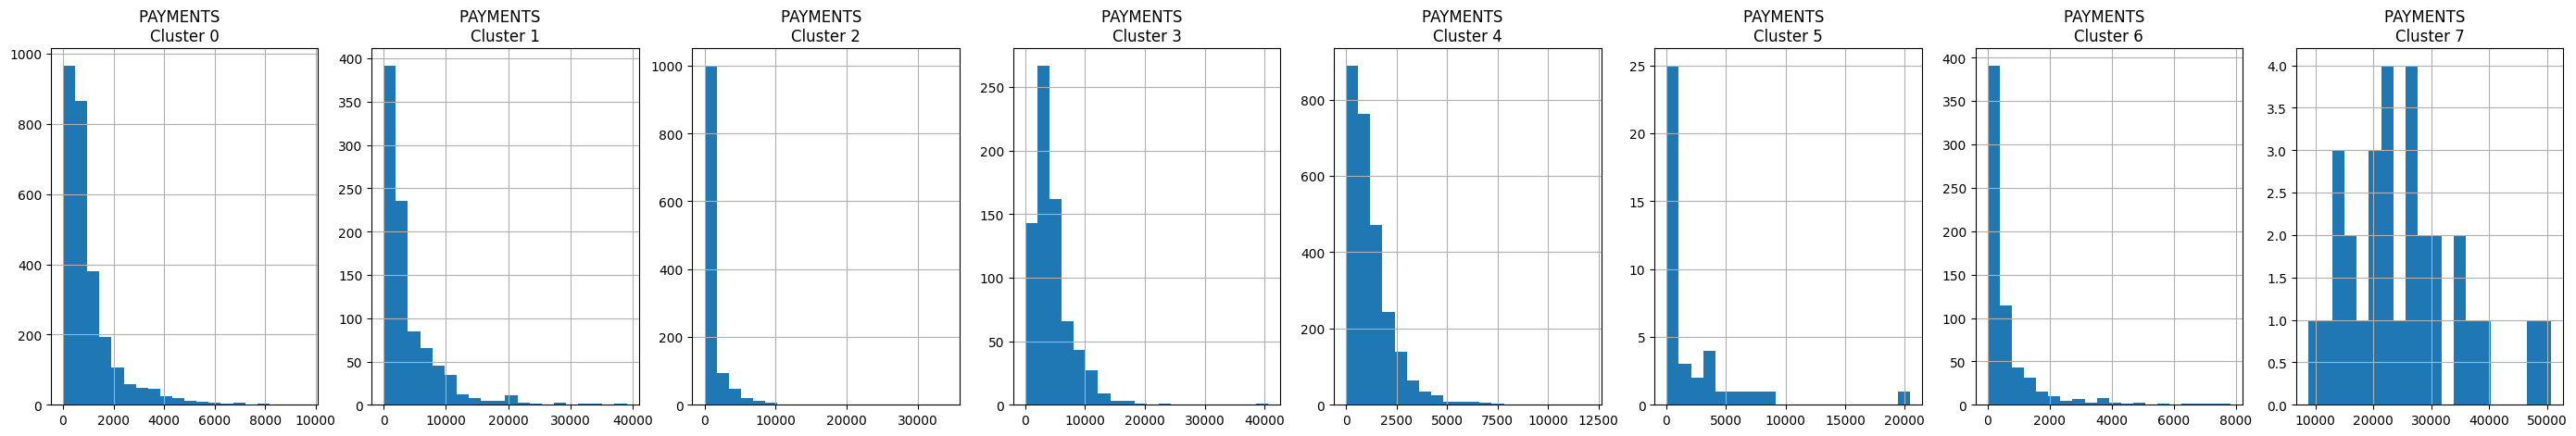

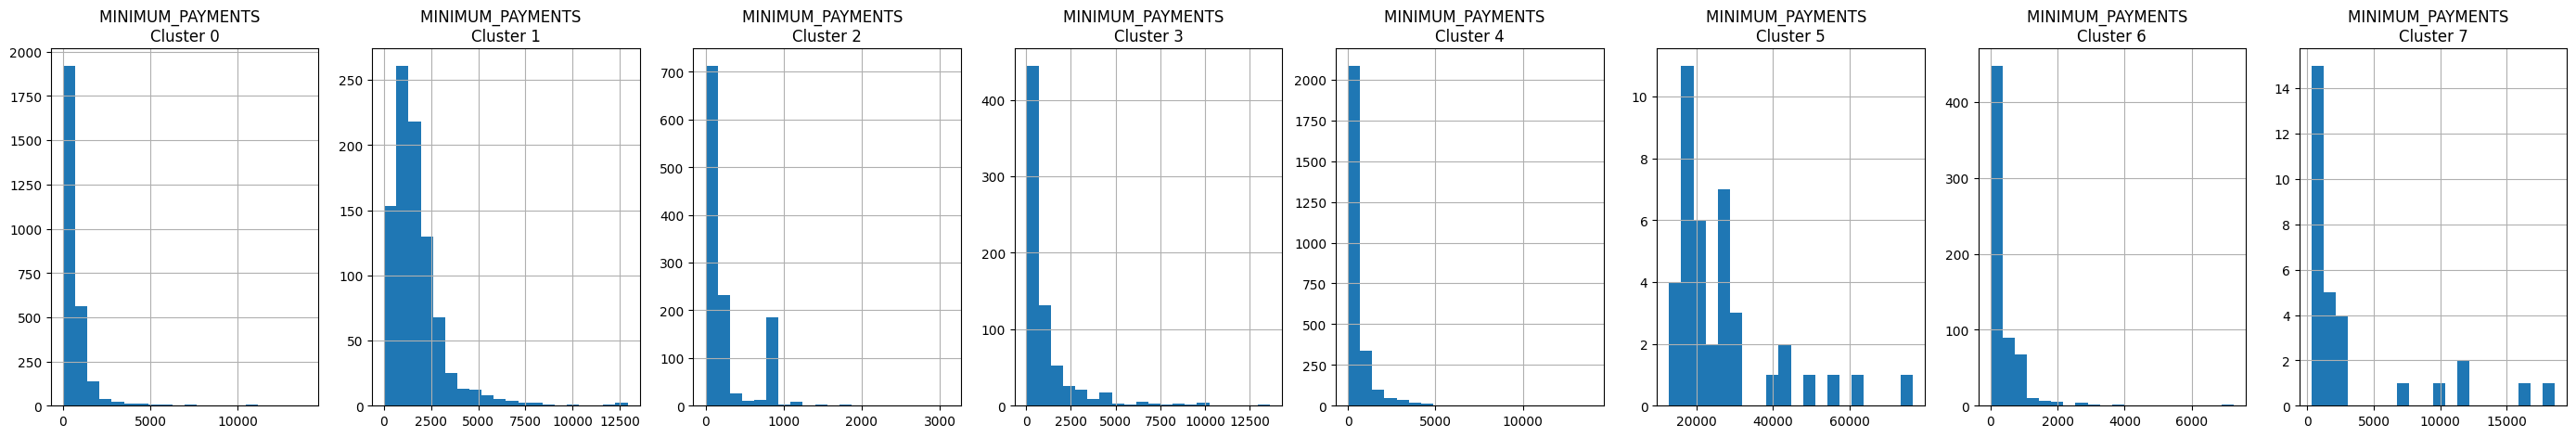

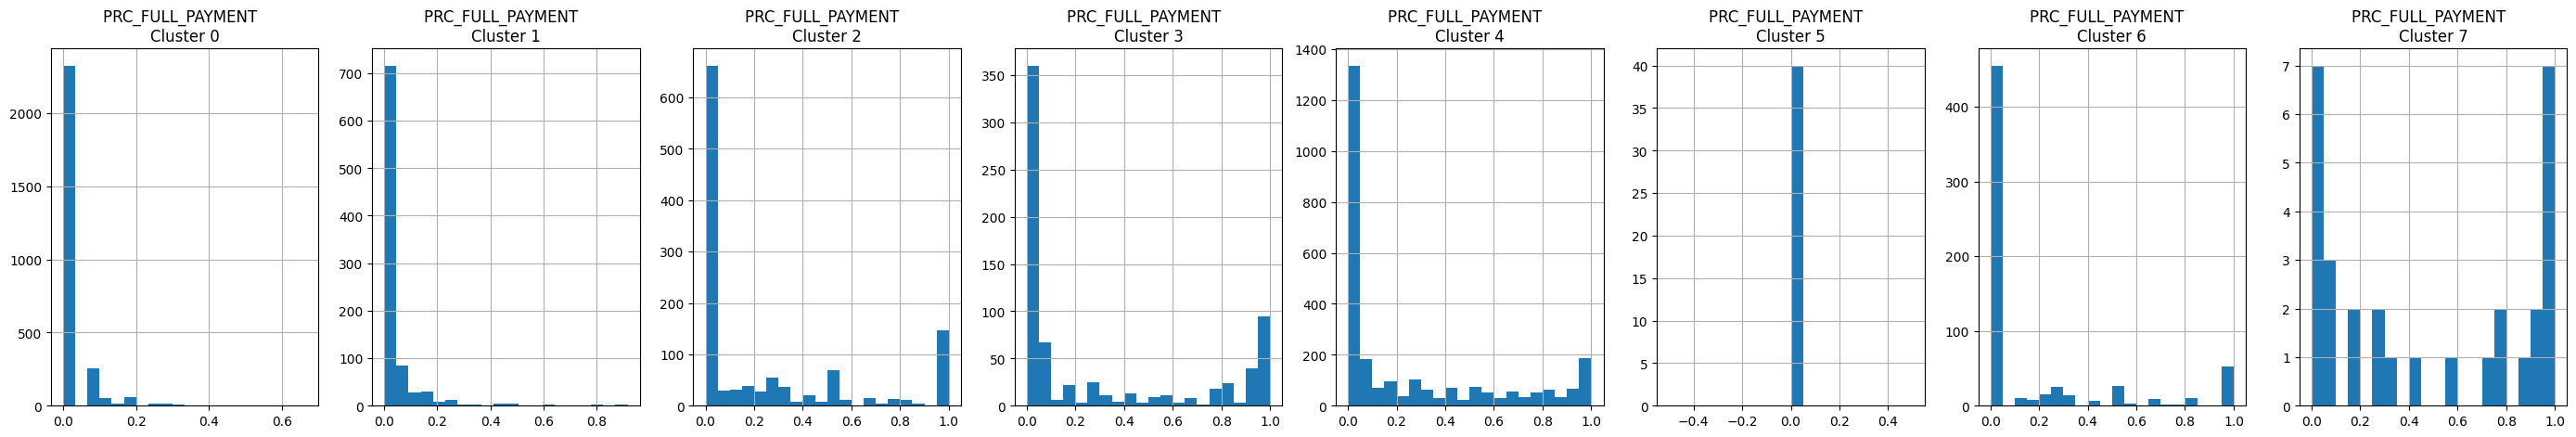

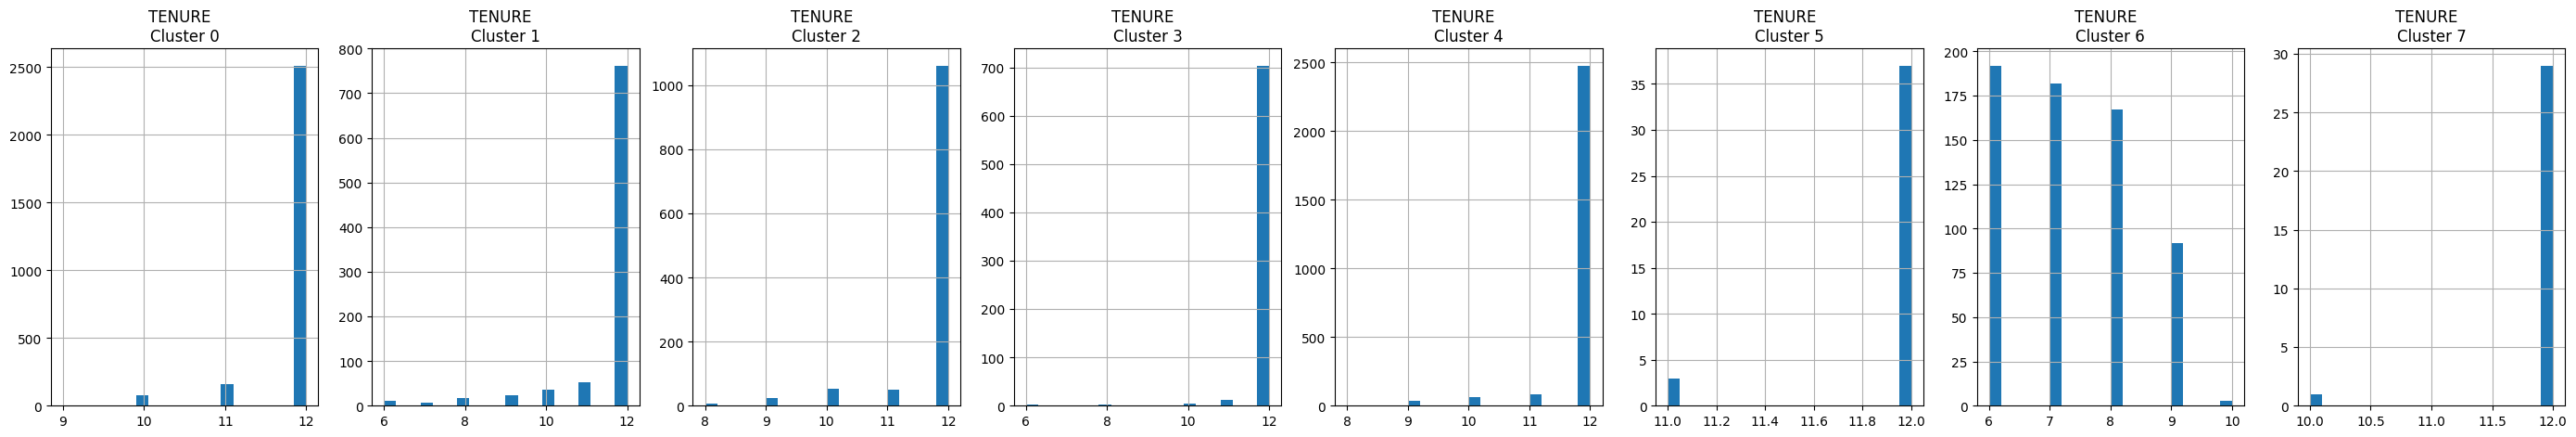

In [166]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8,j+1)
        cluster=df_cluster[df_cluster['cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}  \nCluster {}'.format(i,j))
    plt.show()

In [167]:
#aplicamos PCA para reducir a 2 dimensiones y poder visualizarlos de mejor forma

In [168]:
pca=PCA(n_components=2)
principal_components=pca.fit_transform(df_scaled)
principal_components

array([[-1.68222065, -1.07644676],
       [-1.13829687,  2.50647256],
       [ 0.96968244, -0.38353048],
       ...,
       [-0.92620322, -1.81077893],
       [-2.33654961, -0.65795229],
       [-0.55642035, -0.4004698 ]])

In [169]:
pca_df=pd.DataFrame(data=principal_components,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076447
1,-1.138297,2.506473
2,0.969682,-0.383530
3,-0.873629,0.043168
4,-1.599434,-0.688577


In [170]:
##concat con cluster
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076447,0
1,-1.138297,2.506473,1
2,0.969682,-0.383530,4
3,-0.873629,0.043168,0
4,-1.599434,-0.688577,0


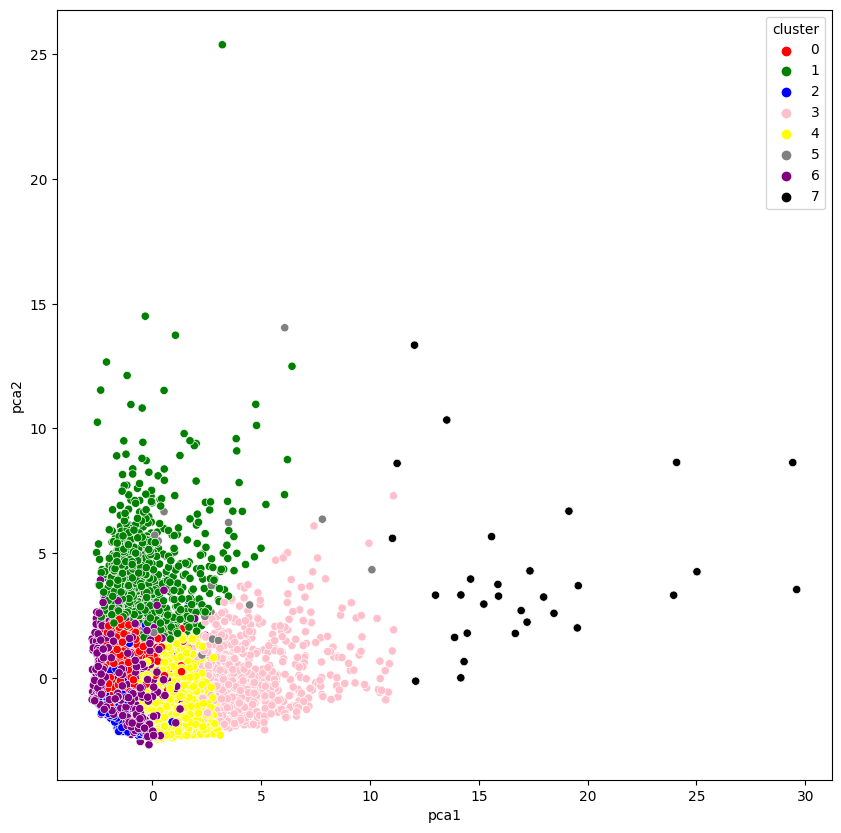

In [171]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,
                  palette=['red','green','blue','pink','yellow','gray','purple','black'])
plt.show()

# 

### Reduccion de dimension con  auto encoders

In [172]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D,BatchNormalization,Flatten,Conv2D,AveragePooling2D,MaxPooling2D,Dropout

In [173]:
from tensorflow.keras.models import Model,load_model


In [174]:
from tensorflow.keras.initializers import glorot_uniform

In [175]:
from keras.optimizers import SGD

In [176]:
encoding_dim=7
input_df=Input(shape=(17, ))
#glorot es un inicializador que toma muestras aleatortias de una normal truncada
x=Dense(encoding_dim,activation='relu')(input_df)
x=Dense(200,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(200,activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(700,activation='relu',kernel_initializer='glorot_uniform')(x)
encoded=Dense(10, activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(700,activation='relu',kernel_initializer='glorot_uniform')(encoded)
x=Dense(200,activation='relu',kernel_initializer='glorot_uniform')(x)
decoded=Dense(17,kernel_initializer='glorot_uniform')(x)
autoencoder=Model(input_df,decoded)
encoder=Model(input_df,encoded)
autoencoder.compile(optimizer='adam',loss='mean_squared_error')





In [83]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 200)               1600      
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 700)               140700    
                                                                 
 dense_4 (Dense)             (None, 10)                7010      
                                                                 
 dense_5 (Dense)             (None, 700)               7700  

In [177]:
autoencoder.fit(df_scaled,df_scaled,batch_size=128,epochs=25,verbose=1)

Epoch 1/25
70/70 [==============================] - 3s 11ms/step - loss: 0.5722
Epoch 2/25
70/70 [==============================] - 1s 10ms/step - loss: 0.3382
Epoch 3/25
70/70 [==============================] - 1s 11ms/step - loss: 0.2239
Epoch 4/25
70/70 [==============================] - 1s 11ms/step - loss: 0.1770
Epoch 5/25
70/70 [==============================] - 1s 9ms/step - loss: 0.1579
Epoch 6/25
70/70 [==============================] - 1s 10ms/step - loss: 0.1463
Epoch 7/25
70/70 [==============================] - 1s 11ms/step - loss: 0.1329
Epoch 8/25
70/70 [==============================] - 1s 11ms/step - loss: 0.1228
Epoch 9/25
70/70 [==============================] - 1s 11ms/step - loss: 0.1177
Epoch 10/25
70/70 [==============================] - 1s 10ms/step - loss: 0.1116
Epoch 11/25
70/70 [==============================] - 1s 12ms/step - loss: 0.1042
Epoch 12/25
70/70 [==============================] - 1s 10ms/step - loss: 0.1008
Epoch 13/25
70/70 [===================

In [178]:
pred=encoder.predict(df_scaled)

280/280 [==============================] - 1s 4ms/step


In [179]:
pred.shape

(8950, 10)

In [180]:
#Aplicamos Kmeans a pred

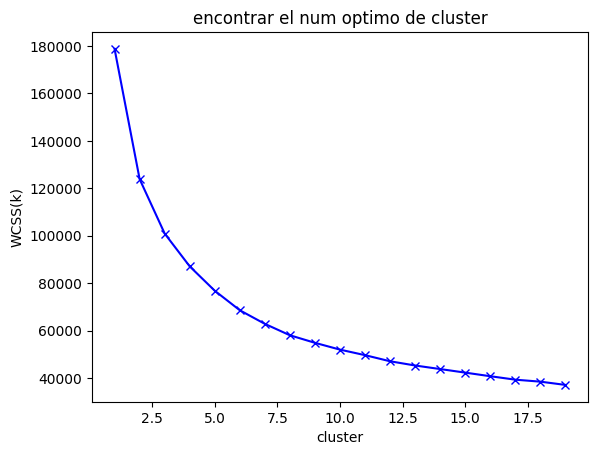

In [182]:
scores_1=[]
range_values=range(1,20)
for i in range_values:
    kmeans=KMeans(n_clusters=i,n_init=10)
    kmeans.fit(pred)#se aplica a los datos
    scores_1.append(kmeans.inertia_)# inertia es la suma de los cuadrados intraclusters

plt.plot(range_values,scores_1,'bx-')
plt.title("encontrar el num optimo de cluster")
plt.xlabel('cluster')
plt.ylabel('WCSS(k)')
plt.show()

In [183]:
kmeans=KMeans(4,n_init=10)
kmeans.fit(pred)
labels=kmeans.labels_
y_kmeans=kmeans.fit_predict(pred)

In [184]:
df_cluster_dr=pd.concat([df,pd.DataFrame({'cluster':labels})],axis=1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [185]:
pca=PCA(n_components=2)
princ_comp=pca.fit_transform(pred)
pca_df=pd.DataFrame(data=princ_comp,columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-3.212018,0.172491
1,-0.538284,-1.731341
2,2.339854,-0.275311
3,-0.513435,-0.211249
4,-3.070291,0.126536


In [186]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df

,pca1,pca2,cluster
0,-3.212018,0.172491,0
1,-0.538284,-1.731341,0
2,2.339854,-0.275311,3
3,-0.513435,-0.211249,0
4,-3.070291,0.126536,0
...,...,...,...
8945,2.979523,-1.048295,3
8946,3.210128,-1.447827,3
8947,2.352595,-1.372063,3
8948,1.262002,-2.654649,3


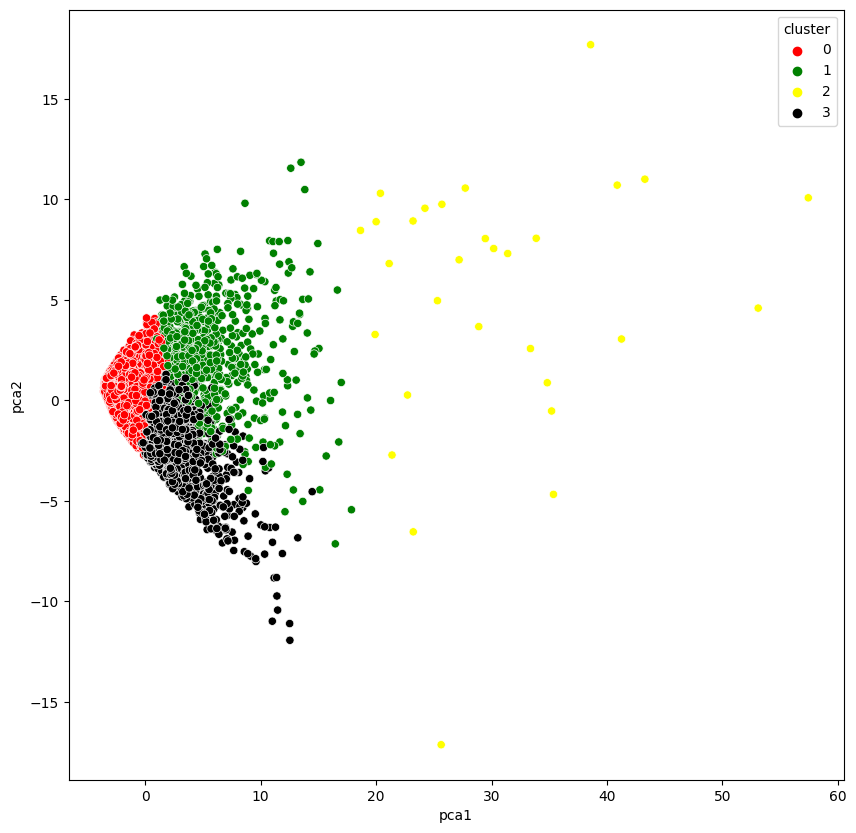

In [187]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='cluster',data=pca_df,palette=['red','green','yellow','black'])
plt.show()